## Top 5 Dimensionality Reduction Techniques

### Why Dimensionality Reduction?

Dimensionality reduction is necessary to simplify datasets, improve machine learning model \
performance, and make data more interpretable and visualizable. 

Key benefits include avoiding the "curse of dimensionality," which occurs when too many features make data \
sparse and difficult to model, and reducing computational costs, storage space, and the 
risk of overfitting. 

### Five Dimensionality Reduction Techniques

- Principal Component Analysis (PCA)

- t-SNE (t-Distributed Stochastic Neighbor Embedding)

- UMAP (Uniform Manifold Approximation and Projection)

- Linear Discriminant Analysis (LDA)

- Autoencoder (Neural Network based)

### Importing Packages

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

/home/mayur/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/mayur/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-24 12:14:31.782593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758696271.799727   86970 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been

### Loading the Dataset

In [3]:
# Load dataset (Iris)
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

In [3]:
X.shape

(150, 4)

In [4]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Principal Component Analysis

Projects the data into directions of maximum variance.

Works well when relationships are linear.

In the Iris dataset, PCA already gives some cluster separation, but classes still overlap.

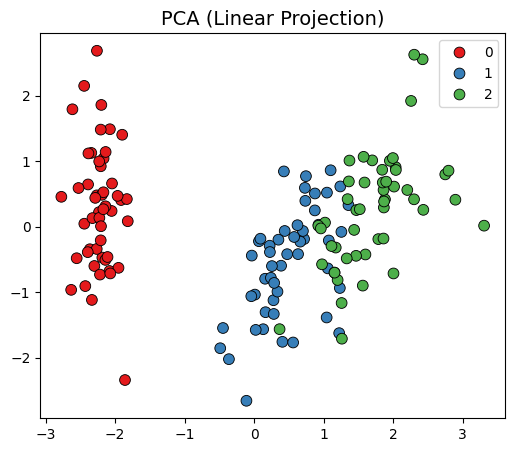

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, 
                palette="Set1", s=60, edgecolor='k')
plt.title("PCA (Linear Projection)", fontsize=14)
plt.show()

#result: Clear separation but only along variance, linear method.

### t-SNE

Focuses on local neighborhood preservation.

Produces well-separated clusters, great for visualizing high-dimensional embeddings.

Here, Iris species appear as distinct clusters, but t-SNE may distort global distances.

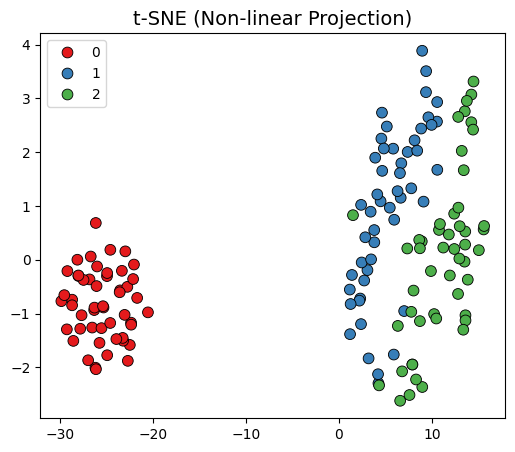

In [7]:
# 2. t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, 
                palette="Set1", s=60, edgecolor='k')
plt.title("t-SNE (Non-linear Projection)", fontsize=14)
plt.show()

#result: Very well-separated clusters (good for visualization, not feature extraction).

### UMAP

Balances local and global structure better than t-SNE.

Faster and scales to larger datasets.

In Iris, UMAP separates classes almost as well as t-SNE but keeps inter-cluster relationships more faithful.

/home/mayur/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mayur/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


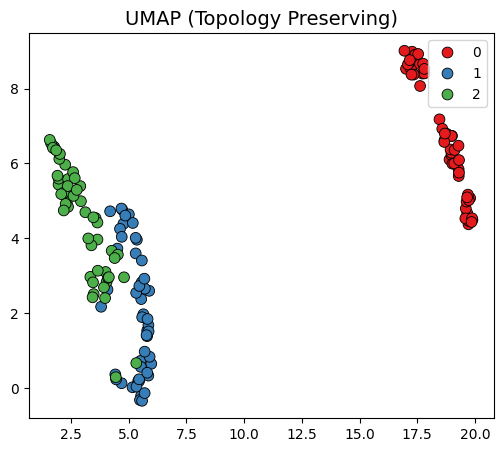

In [8]:
# 3. UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y, 
                palette="Set1", s=60, edgecolor='k')
plt.title("UMAP (Topology Preserving)", fontsize=14)
plt.show()

#result: Similar to t-SNE, faster, preserves global structure better.

### Linear Discriminant Analysis

Supervised method that uses class labels to maximize separation.

Best at separating classes when labels are available.

In Iris, LDA achieves very clean separation between the three species, showing its supervised advantage.

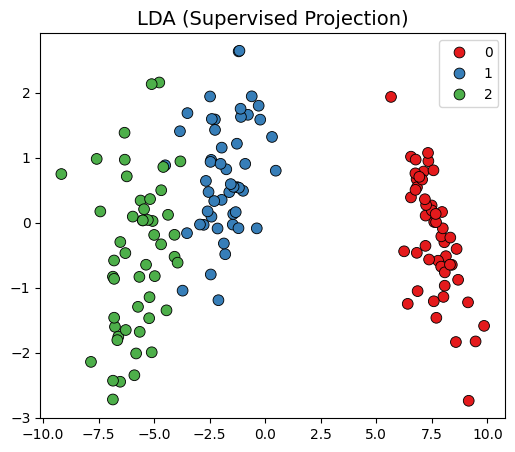

In [9]:
# 4. LDA (Supervised)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=y, 
                palette="Set1", s=60, edgecolor='k')
plt.title("LDA (Supervised Projection)", fontsize=14)
plt.show()

#result: Uses class labels, best separation since it's supervised.


### Autoencoder

Learns a compressed non-linear representation using reconstruction loss.

Flexible and scalable for large datasets.

On Iris, the clusters are visible but not as sharp as t-SNE/UMAP since the autoencoder is unsupervised and trained only for reconstruction.

In [6]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/mayur/.local/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: tensorflow-text, tf_keras


In [ ]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# !pip install --upgrade tensorflow-cpu


2025-09-24 12:14:49.476559: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-09-24 12:14:49.476598: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-09-24 12:14:49.476605: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-09-24 12:14:49.476610: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-09-24 12:14:49.476615: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: mayur
2025-09-24 12:14:49.476619: I external/local_xla/xla/stream_executor/cuda/cuda_di

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


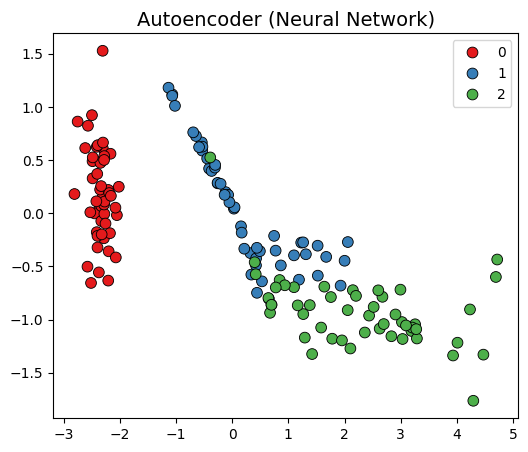

In [4]:
# 5. Autoencoder (fixed version)

input_dim = X_scaled.shape[1]
encoding_dim = 2

# Define encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(8, activation='relu')(input_layer)
bottleneck = layers.Dense(encoding_dim, activation=None)(encoded)

# Decoder
decoded = layers.Dense(8, activation='relu')(bottleneck)
output_layer = layers.Dense(input_dim, activation='linear')(decoded)

# Autoencoder model
autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, verbose=0)

# Extract encoder model
encoder = models.Model(inputs=input_layer, outputs=bottleneck)
X_ae = encoder.predict(X_scaled)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_ae[:,0], y=X_ae[:,1], hue=y, 
                palette="Set1", s=60, edgecolor='k')
plt.title("Autoencoder (Neural Network)", fontsize=14)
plt.show()



#result: Learns compressed representation via deep learning, flexible for large datasets.


In [ ]:
methods = {
    "PCA": X_pca,
    "t-SNE": X_tsne,
    "UMAP": X_umap,
    "LDA": X_lda,
    "Autoencoder": X_ae
}

plt.figure(figsize=(15, 10))

for i, (name, X_embedded) in enumerate(methods.items(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y,
                    palette="Set1", s=60, edgecolor='k')
    plt.title(name, fontsize=14)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.legend([],[], frameon=False)  # hide legend for cleaner view

plt.tight_layout()
plt.show()

Key Takeaways:

PCA/LDA → Best for linear structures (fast, interpretable).

t-SNE/UMAP → Best for visualization of non-linear manifolds (exploration, embeddings).

Autoencoder → Best for feature compression when dealing with very high-dimensional data.